In [1]:
# 이번장은 드래곤볼을 모으는 과정이라 생각하면 편하다.


import numpy as np

#오차제곱 SSE
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

t = [0,0,1,0,0,0,0,0,0,0]

#2일 확률이 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

#7일 확률이 높다고 추정
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))
#윗 값이 손실함수 값이 낮은걸 확인 할 수 있다.

0.09750000000000003
0.5975


In [2]:
#교차엔트로피 오차 CEE
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] #다시 세팅해주고
print(cross_entropy_error(np.array(y), np.array(t)))
#정답이 0.6인데, 교차엔트로피의 값이 0.51이 나왔다. 

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))
#이 사례에서는 정답(2)의 값이 0.1일 경우인데,
#이 경우에서 오차엔트로피의 값이 무려 2.3이 나왔다.
#즉, 오차값이 더 낮은 0.51의 케이스가 정답일 가능성이 높다고 판단하게 된다.

0.510825457099338
2.302584092994546


In [3]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train),(x_test, t_test) = load_mnist(normalize=True, one_hot_label= True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [4]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) #train_size (6만개)에서 배치사이즈 10개 를 무작위로 뽑아냄
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [5]:
#배치용 교차 엔트로피 오차 구현하기
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size) #t : 정답 레이블
        y = y.reshape(1, y.size) #y : 신경망의 출력
        #reshape : 데이터 하나당 교체 엔트로피 오차를 구함
        
        batch_size = y.shape[0] 
        return -np.sum(t * np.log(y + 1e-7)) / batch_size
#원핫에서는 t가 0이면 그 계산은 무시해도 좋다.

#정답이 원핫인코딩이 아니라,숫자 레이블로 주어졌을 경우
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
        batch_size = y.shape[0] 
        return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
#원핫에서 np.log(y)였던 부분을 원핫이 아닌경우는 위처럼 상세하게 표현해줘야한다.

#np.log(y[np.arange(batch_size), t])
#np.arange(batch_size) : 0부터 batchsize -1 까지 배열생성
#batch_size가 5면 0~4라는 넘파이 배열을 생성
#고로 숫자 레이블이 담긴 t에 해당하는 신경망의 출력을 추출하게 된다.
#y[0,2], y[1,7] ... 같은 넘파이 배열이 생성된다

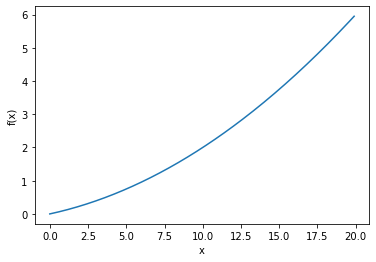

In [6]:
#해석미분
def numerical_diff(f, x):
    h = 10e-50 
    return (f(x+h) - f(x)) / h
#정말 작은 크기는 해결하지 못한다

#수치미분
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x): #그냥 임의의 함수 구현
    return 0.01 * x ** 2 + 0.1 * x

import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # [0,20) 0.1간격의 배열 x를 만들자
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [7]:
numerical_diff(function_1, 5)

0.1999999999990898

In [8]:
numerical_diff(function_1, 10)

0.2999999999986347

In [9]:
#편미분
def function_2(x): #인수들의 제곱합을 계산하는 단순 식 
    return x[0]**2 + x[1]**2 # 또는 return np,sum(x**2)

#문1, x0 =3, x1=4일때 x0에 대한 편미분 df/dx0 를 구하라
def function_tmp1(x0): 
    return x0 * x0 + 4.0 ** 2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [10]:
#문2, x0 =3, x1=4일때 x1에 대한 편미분 df/dx1 를 구하라
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [11]:
#기울기
#위와 다르게 x0와 x1의 편미분을 동시에 계산하고 싶다면?
#모든 변수의 편미분을 벡터로 정리 : 기울기
def numerical_gradient(f, x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x와 형상이 같고 원소가 모드 0인 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]   #f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h #f(x-h) 계산
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #값 복원
        
    return grad

In [12]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))
#임의의 세 점에서의 기울기를 구해봄.

[6. 8.]
[0. 4.]
[6. 0.]


In [13]:
#gradient
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    #init_x는 초기값, lr : learning rate 학습률 값, step_num : 경사법에 따른 반복 횟수 
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x

In [14]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x , lr=0.1, step_num = 100)
#0에 가까운 결과값이 나왔다.

array([-6.11110793e-10,  8.14814391e-10])

In [15]:
#lr값에 따라 값이 차이가 나는 것을 체감해보자
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x , lr=10.0, step_num = 100)

print(gradient_descent(function_2, init_x = init_x , lr=10.0, step_num = 100))
print(gradient_descent(function_2, init_x = init_x , lr=1e-10, step_num = 100)) 
#바로 이렇게 넘어가면 첫번째 프린트문 결과가 또 뜬다 왜 그런걸까?

[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]


In [16]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x , lr=10.0, step_num = 100)) #학습률이 너무 커 발산해버린 사례

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x , lr=1e-10, step_num = 100)) 
#이렇게 해줘야한다.

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


In [17]:
#신경망에서의 기울기
#가중치 매개변수에 대한 손실함수의 기울기
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) #정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x ,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [18]:
net = simpleNet()
print(net.W) #실행할때마다 계속 바뀐다.

[[-0.28863446 -0.66108606  0.57079283]
 [ 0.77733796  0.46054273  0.73756407]]


In [19]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

[0.52642349 0.01783682 1.00628336]


In [20]:
np.argmax(p) #최댓값의 인덱스

2

In [21]:
t = np.array([0,0,1])
print(net.loss(x,t))

0.6886491183404473


In [22]:
# def f(W):
#     return net.loss(x, t)
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.18649795  0.11214959 -0.29864754]
 [ 0.27974693  0.16822438 -0.44797131]]


In [23]:
#신경망 학습 절차
# 전제 : 
# 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라고 한다.

# 1단계 - 미니배치:
# 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하고, 그 미니배치의 손실 함수 값을 줄이는 것이 목표다.

# 2단계 - 기울기 산출 :
# 미니뱇의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실함수의 값을 가장 작게 하는 방향을 제시한다.

# 3단계 - 매개변수 갱신 :
# 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

# 4단계 - 반복
# 1~3단계를 반복한다.

In [24]:
#미니배치를 무작위로 선정하기에, 확률적 경사 하강법 SGD라 부른다.
#cs231n에 해당 코드가 나온다 한다.
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        #               입력층의 뉴런 수 , 은닉층, 출력층, 출력층
        #가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) #1번째 층의 가중치
        self.params['b1'] = np.zeros(hidden_size)                                      # 1전째 층의 편향
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x): #예측 수행
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self,x,t): #x는 이미지의 데이터 , t는 정답레이블
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    def accuracy(self,x,t): #정확도를 구한다
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self,x, t): #가중치의 매개변수의 기울기를 구한다
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}    #기울기를 보관하는 딕셔너리 변수
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])  # 1번째 층의 가중치의 기울기
        grads['b1'] = numerical_gradient(loss_W, self.params['b1']) # 1번째 층의 편향의 기울기
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [25]:
net = TwoLayerNet(input_size = 784, hidden_size=100, output_size=10)
net.params['W1'].shape
print(net.params['W1'].shape)
net.params['b1'].shape
print(net.params['b1'].shape)
net.params['W2'].shape
print(net.params['W2'].shape)
net.params['b2'].shape
print(net.params['b2'].shape)
#params에는 신경망에 필요한 매개변수가 모두 저장된다.

(784, 100)
(100,)
(100, 10)
(10,)


In [26]:
#예측처리가 순방향으로 진행
x = np.random.rand(100,784)
y = net.predict(x)
#grads에는 params 변수에 대응하는 각 매개변수의 기울기가 저장된다

In [27]:
x = np.random.rand(100, 784) #더미 입력 데이터(100장 분량)
t = np.random.rand(100,10)   #더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x,t) #기울기 계산

grads['W1'].shape
print(grads['W1'].shape)
grads['b1'].shape
print(grads['b1'].shape)
grads['W2'].shape
print(grads['W2'].shape)
grads['b2'].shape
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
#미니배치 학습
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []

#하이퍼 파라미터
iters_num = 10000 #반복횟수
train_size = x_train.shape[0]
batch_size = 100 #미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):#미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    #grad = network.gradient(x_batch, t_batch) #성능개선 버전
    
    #매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    #학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    

In [ ]:
#윗 결과 수정
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)


iters_num = 10000 
train_size = x_train.shape[0]
batch_size = 100 
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

#1에폭당 반복 수 
iters_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    #1 에폭당 정확도 계산 
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc |" + str(train_acc)+ ", " + str(test_acc))